In [1]:
import pandas as pd
from datetime import datetime
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import glob

In [2]:
# Unpack all the csv files into a series
purplefile = pd.Series(glob.glob('./aqm/*.csv'))
purplefile

0      ./aqm/20200823.csv
1      ./aqm/20200604.csv
2      ./aqm/20200610.csv
3      ./aqm/20200406.csv
4      ./aqm/20200412.csv
              ...        
182    ./aqm/20200423.csv
183    ./aqm/20200609.csv
184    ./aqm/20200621.csv
185    ./aqm/20200812.csv
186    ./aqm/20200806.csv
Length: 187, dtype: object

In [3]:
# List columns of interest
impcolum = ['UTCDateTime', 'current_temp_f', 'current_humidity', 'current_dewpoint_f', 'pressure', 'pm2_5_atm', 'pm2_5_atm_b']

In [4]:
# Make an empty DataFrame to store values
purple = pd.DataFrame(columns=impcolum)

In [32]:
# Loop through all .csv files in the working directory
for i in purplefile:
    file = pd.read_csv(i, usecols=impcolum)
    purple = pd.concat([purple, file], ignore_index=True)

In [6]:
# Remove NA values
purple = purple.dropna()
purple

,UTCDateTime,current_temp_f,current_humidity,current_dewpoint_f,pressure,pm2_5_atm,pm2_5_atm_b
0,2020/08/23T00:00:51z,82,67,70,1010.82,14.50,14.61
1,2020/08/23T00:02:50z,81,68,69,1010.77,13.60,14.58
2,2020/08/23T00:04:50z,81,68,69,1010.74,14.12,14.39
3,2020/08/23T00:06:50z,81,68,69,1010.72,14.79,14.54
4,2020/08/23T00:08:50z,81,68,69,1010.69,15.37,15.71
...,...,...,...,...,...,...,...
133838,2020/08/06T23:51:32z,79,67,67,1013.03,223.68,223.99
133839,2020/08/06T23:53:32z,78,67,66,1013.02,228.79,229.81
133840,2020/08/06T23:55:32z,79,66,67,1013.01,180.11,188.66
133841,2020/08/06T23:57:35z,79,66,67,1012.95,164.83,163.93


<Axes: xlabel='UTCDateTime'>

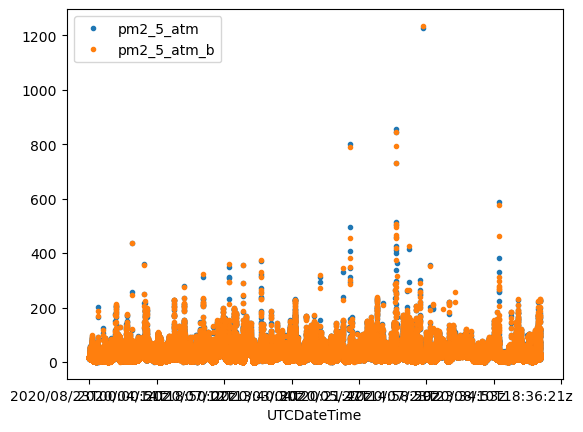

In [7]:
purple.plot(x='UTCDateTime',y=['pm2_5_atm', 'pm2_5_atm_b'],marker='.',linestyle='none')

In [8]:
# Clean data
# Replace random letters in date column with spaces
#purple['UTCDateTime'] = purple['UTCDateTime'].str.replace("[A-Za-z]", " ")

In [9]:
# Convert column text to date data type
purple['UTCDateTime'] = pd.to_datetime(purple['UTCDateTime'], 
                                       format='%Y/%m/%dT%H:%M:%Sz',
                                      exact=False)
purple

,UTCDateTime,current_temp_f,current_humidity,current_dewpoint_f,pressure,pm2_5_atm,pm2_5_atm_b
0,2020-08-23 00:00:51,82,67,70,1010.82,14.50,14.61
1,2020-08-23 00:02:50,81,68,69,1010.77,13.60,14.58
2,2020-08-23 00:04:50,81,68,69,1010.74,14.12,14.39
3,2020-08-23 00:06:50,81,68,69,1010.72,14.79,14.54
4,2020-08-23 00:08:50,81,68,69,1010.69,15.37,15.71
...,...,...,...,...,...,...,...
133838,2020-08-06 23:51:32,79,67,67,1013.03,223.68,223.99
133839,2020-08-06 23:53:32,78,67,66,1013.02,228.79,229.81
133840,2020-08-06 23:55:32,79,66,67,1013.01,180.11,188.66
133841,2020-08-06 23:57:35,79,66,67,1012.95,164.83,163.93


In [10]:
# Subset the data for March 2020 and beyond
purple = purple[purple['UTCDateTime'] >= pd.to_datetime("2020-03-01")]
purple

,UTCDateTime,current_temp_f,current_humidity,current_dewpoint_f,pressure,pm2_5_atm,pm2_5_atm_b
0,2020-08-23 00:00:51,82,67,70,1010.82,14.50,14.61
1,2020-08-23 00:02:50,81,68,69,1010.77,13.60,14.58
2,2020-08-23 00:04:50,81,68,69,1010.74,14.12,14.39
3,2020-08-23 00:06:50,81,68,69,1010.72,14.79,14.54
4,2020-08-23 00:08:50,81,68,69,1010.69,15.37,15.71
...,...,...,...,...,...,...,...
133838,2020-08-06 23:51:32,79,67,67,1013.03,223.68,223.99
133839,2020-08-06 23:53:32,78,67,66,1013.02,228.79,229.81
133840,2020-08-06 23:55:32,79,66,67,1013.01,180.11,188.66
133841,2020-08-06 23:57:35,79,66,67,1012.95,164.83,163.93


In [11]:
# Save cleaned data file for potential future use
purple.to_csv("PurpleAir_clean.csv", index=False)

In [12]:
# Read in cleaned data
purpledata = pd.read_csv("PurpleAir_clean.csv")
purpledata

,UTCDateTime,current_temp_f,current_humidity,current_dewpoint_f,pressure,pm2_5_atm,pm2_5_atm_b
0,2020-08-23 00:00:51,82.0,67.0,70.0,1010.82,14.50,14.61
1,2020-08-23 00:02:50,81.0,68.0,69.0,1010.77,13.60,14.58
2,2020-08-23 00:04:50,81.0,68.0,69.0,1010.74,14.12,14.39
3,2020-08-23 00:06:50,81.0,68.0,69.0,1010.72,14.79,14.54
4,2020-08-23 00:08:50,81.0,68.0,69.0,1010.69,15.37,15.71
...,...,...,...,...,...,...,...
133830,2020-08-06 23:51:32,79.0,67.0,67.0,1013.03,223.68,223.99
133831,2020-08-06 23:53:32,78.0,67.0,66.0,1013.02,228.79,229.81
133832,2020-08-06 23:55:32,79.0,66.0,67.0,1013.01,180.11,188.66
133833,2020-08-06 23:57:35,79.0,66.0,67.0,1012.95,164.83,163.93


In [13]:
# Read in reference data
embassydata = pd.read_csv("./Accra_PM2.5_2020_YTD.csv")

In [14]:
# Make sure dates are in the "date" data type
purpledata['date'] = pd.to_datetime(purpledata['UTCDateTime'])
embassydata['date'] = pd.to_datetime(embassydata['Date (LT)'])
embassydata

/var/folders/d3/z1hh03l929gdlgfh23vm9h0c0000gp/T/ipykernel_45031/1448113883.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  embassydata['date'] = pd.to_datetime(embassydata['Date (LT)'])


,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,date
0,Accra,PM2.5 - Principal,2020-01-27 04:00 PM,2020,1,27,16,-999.0,-999,NaN,-5.0,UG/M3,1 Hr,Invalid,2020-01-27 16:00:00
1,Accra,PM2.5 - Principal,2020-01-27 06:00 PM,2020,1,27,18,-999.0,-999,NaN,-12.0,UG/M3,1 Hr,Invalid,2020-01-27 18:00:00
2,Accra,PM2.5 - Principal,2020-01-27 07:00 PM,2020,1,27,19,-999.0,-999,NaN,-7.0,UG/M3,1 Hr,Invalid,2020-01-27 19:00:00
3,Accra,PM2.5 - Principal,2020-01-27 08:00 PM,2020,1,27,20,-999.0,-999,NaN,-4.0,UG/M3,1 Hr,Invalid,2020-01-27 20:00:00
4,Accra,PM2.5 - Principal,2020-01-27 09:00 PM,2020,1,27,21,-999.0,-999,NaN,-7.0,UG/M3,1 Hr,Invalid,2020-01-27 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,Accra,PM2.5 - Principal,2020-12-31 08:00 PM,2020,12,31,20,49.1,134,Unhealthy for Sensitive Groups,53.0,UG/M3,1 Hr,Valid,2020-12-31 20:00:00
8043,Accra,PM2.5 - Principal,2020-12-31 09:00 PM,2020,12,31,21,49.3,135,Unhealthy for Sensitive Groups,51.0,UG/M3,1 Hr,Valid,2020-12-31 21:00:00
8044,Accra,PM2.5 - Principal,2020-12-31 10:00 PM,2020,12,31,22,49.2,135,Unhealthy for Sensitive Groups,49.0,UG/M3,1 Hr,Valid,2020-12-31 22:00:00
8045,Accra,PM2.5 - Principal,2020-12-31 11:00 PM,2020,12,31,23,50.2,137,Unhealthy for Sensitive Groups,54.0,UG/M3,1 Hr,Valid,2020-12-31 23:00:00


In [15]:
# Subset embassy dates to align with purpleair dates
embassydata = embassydata[(embassydata['date'] >= pd.to_datetime("2020-03-02")) & 
                          (embassydata['date'] <= pd.to_datetime("2020-09-04"))]

In [16]:
# Only keep necessary columns and data > 0
embassydata = embassydata[['date', 'Raw Conc.']]
embassydata = embassydata[embassydata['Raw Conc.'] > 0]
embassydata

,date,Raw Conc.
814,2020-03-02 00:00:00,40.0
815,2020-03-02 01:00:00,40.0
816,2020-03-02 02:00:00,36.0
817,2020-03-02 03:00:00,35.0
818,2020-03-02 04:00:00,36.0
...,...,...
5218,2020-09-03 20:00:00,15.0
5219,2020-09-03 21:00:00,15.0
5220,2020-09-03 22:00:00,13.0
5221,2020-09-03 23:00:00,15.0


In [17]:
# Average the two PurpleAir sensors
purpledata['pm2_5_avg'] = purpledata[['pm2_5_atm', 'pm2_5_atm_b']].mean(axis=1)
purpledata

,UTCDateTime,current_temp_f,current_humidity,current_dewpoint_f,pressure,pm2_5_atm,pm2_5_atm_b,date,pm2_5_avg
0,2020-08-23 00:00:51,82.0,67.0,70.0,1010.82,14.50,14.61,2020-08-23 00:00:51,14.555
1,2020-08-23 00:02:50,81.0,68.0,69.0,1010.77,13.60,14.58,2020-08-23 00:02:50,14.090
2,2020-08-23 00:04:50,81.0,68.0,69.0,1010.74,14.12,14.39,2020-08-23 00:04:50,14.255
3,2020-08-23 00:06:50,81.0,68.0,69.0,1010.72,14.79,14.54,2020-08-23 00:06:50,14.665
4,2020-08-23 00:08:50,81.0,68.0,69.0,1010.69,15.37,15.71,2020-08-23 00:08:50,15.540
...,...,...,...,...,...,...,...,...,...
133830,2020-08-06 23:51:32,79.0,67.0,67.0,1013.03,223.68,223.99,2020-08-06 23:51:32,223.835
133831,2020-08-06 23:53:32,78.0,67.0,66.0,1013.02,228.79,229.81,2020-08-06 23:53:32,229.300
133832,2020-08-06 23:55:32,79.0,66.0,67.0,1013.01,180.11,188.66,2020-08-06 23:55:32,184.385
133833,2020-08-06 23:57:35,79.0,66.0,67.0,1012.95,164.83,163.93,2020-08-06 23:57:35,164.380


In [18]:
# Put temperature in Celsius
purpledata['temp_C'] = (purpledata['current_temp_f'] - 32) * (5/9)
purpledata['dewpoint_C'] = (purpledata['current_dewpoint_f'] - 32) * (5/9)

In [19]:
# Take daily average of purple air. round to the floor of the day
purpleday = purpledata.groupby(purpledata['date'].dt.floor('d')).agg(
    purpleair_pm2_5=('pm2_5_avg', 'mean'),
    temp=('temp_C', 'mean'),
    RH=('current_humidity', 'mean'),
    dewpoint=('dewpoint_C', 'mean')
).reset_index()



In [20]:
#embassy data daily average
embassyday = embassydata.groupby(embassydata['date'].dt.floor('d')).agg(
    embassy_pm2_5=('Raw Conc.', 'mean')
).reset_index()

In [21]:
embassyday

,date,embassy_pm2_5
0,2020-03-02,48.333333
1,2020-03-03,46.708333
2,2020-03-04,32.291667
3,2020-03-05,32.583333
4,2020-03-06,45.458333
...,...,...
182,2020-08-31,22.083333
183,2020-09-01,20.000000
184,2020-09-02,18.583333
185,2020-09-03,17.958333


In [22]:
#merge purpleair and embassy data
purple_embassy_day = pd.merge(purpleday, embassyday, on='date')
purple_embassy_day

,date,purpleair_pm2_5,temp,RH,dewpoint,embassy_pm2_5
0,2020-03-02,32.923952,34.337425,56.065156,24.028958,48.333333
1,2020-03-03,49.739841,31.695137,59.667590,22.519237,46.708333
2,2020-03-04,40.263677,33.425669,55.254848,22.743152,32.291667
3,2020-03-05,31.880970,34.014312,56.290859,23.608033,32.583333
4,2020-03-06,48.299910,32.860111,55.826870,22.614651,45.458333
...,...,...,...,...,...,...
182,2020-08-31,31.956099,29.027206,61.722239,20.634376,22.083333
183,2020-09-01,23.211636,28.946147,62.242340,20.728877,20.000000
184,2020-09-02,22.701766,28.782259,62.399166,20.601916,18.583333
185,2020-09-03,20.716001,57.565291,62.015299,21.999691,17.958333


<Axes: xlabel='date'>

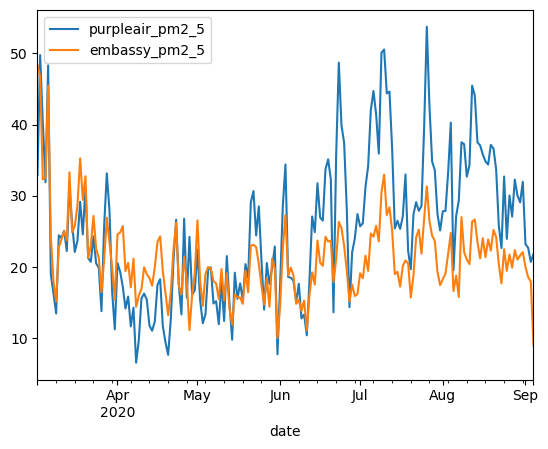

In [23]:
purple_embassy_day.plot(x='date',y=['purpleair_pm2_5','embassy_pm2_5'])

In [24]:
# Calculate raw R2 and MAE
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return r_value**2

R2_raw = rsquared(purple_embassy_day['embassy_pm2_5'], 
                              purple_embassy_day['purpleair_pm2_5'])
MAE_raw = mean_absolute_error(purple_embassy_day['embassy_pm2_5'], 
                              purple_embassy_day['purpleair_pm2_5'])
print("Raw data R2 is ", R2_raw)
print("Raw data MAE is ", MAE_raw)

Raw data R2 is  0.4736683109449379
Raw data MAE is  6.565028650673079


In [25]:
# Split sample into test and training set
train, test = train_test_split(purple_embassy_day, test_size=0.2, random_state=70)

In [26]:
# Create MLR model
model = LinearRegression()
model.fit(train[['purpleair_pm2_5', 'temp', 'RH']], train['embassy_pm2_5'])

LinearRegression()

In [27]:
# Apply model to test dataset
test['pm2.5_c'] = model.predict(test[['purpleair_pm2_5', 'temp', 'RH']])

# Apply to the entire dataset for plotting purposes
purple_embassy_day['pm2.5_c'] = model.predict(purple_embassy_day[['purpleair_pm2_5', 'temp', 'RH']])

In [28]:
# Calculate R2 and MAE for test data set only
R2_test = model.score(test[['purpleair_pm2_5', 'temp', 'RH']], test['embassy_pm2_5'])
MAE_test = mean_absolute_error(test['embassy_pm2_5'], test['pm2.5_c'])

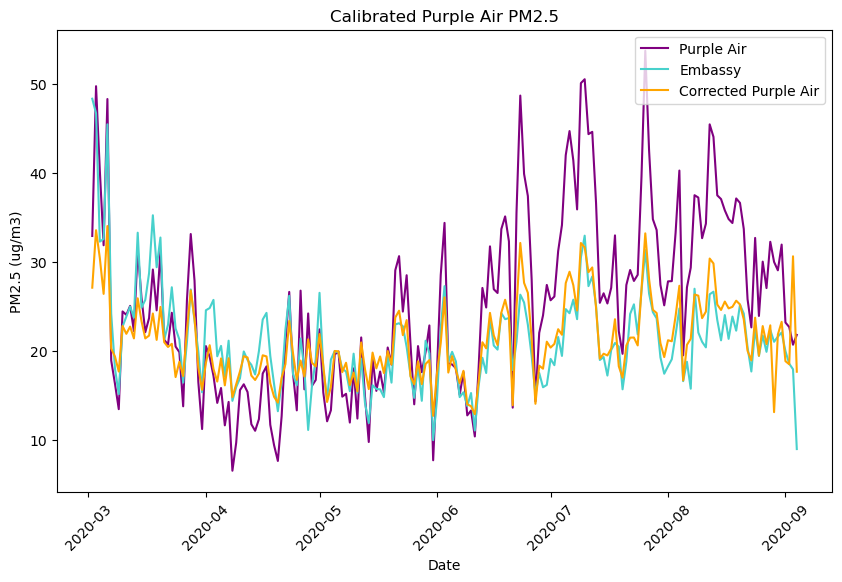

R^2 for test dataset: 0.4976480858297121
MAE for test dataset: 2.5611208435763246


In [29]:
# Plot data
plt.figure(figsize=(10, 6))
plt.plot(purple_embassy_day['date'], purple_embassy_day['purpleair_pm2_5'], label='Purple Air', color='purple')
plt.plot(purple_embassy_day['date'], purple_embassy_day['embassy_pm2_5'], label='Embassy', color='mediumturquoise')
plt.plot(purple_embassy_day['date'], purple_embassy_day['pm2.5_c'], label='Corrected Purple Air', color='orange')
plt.xlabel('Date')
plt.ylabel('PM2.5 (ug/m3)')
plt.title('Calibrated Purple Air PM2.5')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Print model stats
print("R^2 for test dataset:", R2_test)
print("MAE for test dataset:", MAE_test)

In [30]:
#print model coefficients
print(model.coef_)

[ 0.49084536  0.45279662 -0.1683961 ]


In [31]:
#RefPM2.5 = 0.49*purpleair + 0.45*T - 0.16*RH